In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 32})
sns.set_context("poster", rc={"font.size":34,"axes.titlesize":34,"axes.labelsize":34, "lines.linewidth": 2})  
plt.rcParams['figure.figsize'] = 18, 12

pd.options.display.max_columns = 999
pd.options.display.max_rows = 9999


from datetime import datetime
str(datetime.now())




'2018-08-15 14:54:00.222005'

In [45]:
df = pd.read_csv('../../measurements/Excel Files/task 3/Western Basin/detroitriver_average.csv', encoding="ISO-8859-1")

In [46]:
df.head()

,Year,Month,Day,Inflow volume [m3 d-1],Inflow temperature [°C],*Suspended sediment concentration [mg m-3],"*Orthophosphate, water, filtered, as phosphorus [mg m-3]","*Phosphorus, water, unfiltered, as phosphorus [mg m-3]","*Phosphorus, water, filtered, as phosphorus [mg m-3]","*Orthophosphate, water, filtered, as PO4 [mg m-3]",Inflow concentration of chlorophyll-a (Chla-P) [mg m-3],Inflow concentration of dissolved organic carbon (DOC) [mg m-3],Inflow concentration of dissolved inorganic carbon (DIC) [mg m-3],Inflow concentration of O2 [mg m-3],Inflow concentration of NO3 [mg m-3],Inflow concentration of NH4 [mg m-3],Inflow concentration of SO4 [mg m-3],Inflow concentration of aqueous iron (Fe2+) [mg m-3],Inflow concentration of Ca2+ [mg m-3],Inflow pH,Inflow concentration of CH4 [mg m-3],Inflow concentration of total solid iron (Fe3+) [mg m-3],Inflow concentration of aluminum (Al3+) [mg m-3],Inflow concentration of dissolved silica [mg m-3],"*Iron, suspended sediment, recoverable [mg m-3]","*Iron, water, unfiltered, recoverable [mg m-3]","*Iron, water, filtered [mg m-3]","*Suspended solids, water, unfiltered [mg m-3]"
0,1997.0,10.0,1.0,107649.324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997.0,10.0,2.0,97863.02184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1997.0,10.0,3.0,90523.2952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1997.0,10.0,4.0,90523.2952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1997.0,10.0,5.0,88076.71966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
for c in df.columns:
    df[c] = pd.to_numeric(df[c], errors='coerce')
    df.rename(index=str, columns={c: c.strip()}, inplace=True)

In [48]:
df = df.dropna(subset=['Year', 'Month', 'Day'])

In [49]:
df.head()

,Year,Month,Day,Inflow volume [m3 d-1],Inflow temperature [°C],*Suspended sediment concentration [mg m-3],"*Orthophosphate, water, filtered, as phosphorus [mg m-3]","*Phosphorus, water, unfiltered, as phosphorus [mg m-3]","*Phosphorus, water, filtered, as phosphorus [mg m-3]","*Orthophosphate, water, filtered, as PO4 [mg m-3]",Inflow concentration of chlorophyll-a (Chla-P) [mg m-3],Inflow concentration of dissolved organic carbon (DOC) [mg m-3],Inflow concentration of dissolved inorganic carbon (DIC) [mg m-3],Inflow concentration of O2 [mg m-3],Inflow concentration of NO3 [mg m-3],Inflow concentration of NH4 [mg m-3],Inflow concentration of SO4 [mg m-3],Inflow concentration of aqueous iron (Fe2+) [mg m-3],Inflow concentration of Ca2+ [mg m-3],Inflow pH,Inflow concentration of CH4 [mg m-3],Inflow concentration of total solid iron (Fe3+) [mg m-3],Inflow concentration of aluminum (Al3+) [mg m-3],Inflow concentration of dissolved silica [mg m-3],"*Iron, suspended sediment, recoverable [mg m-3]","*Iron, water, unfiltered, recoverable [mg m-3]","*Iron, water, filtered [mg m-3]","*Suspended solids, water, unfiltered [mg m-3]"
0,1997.0,10.0,1.0,107649.32400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997.0,10.0,2.0,97863.02184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1997.0,10.0,3.0,90523.29520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1997.0,10.0,4.0,90523.29520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1997.0,10.0,5.0,88076.71966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
from datetime import datetime
df['Date'] = df.apply(lambda x:datetime.strptime("{0} {1} {2} 00:00:00".format(int(x['Year']), int(x['Month']), int(x['Day'])), "%Y %m %d %H:%M:%S"),axis=1)

In [51]:
df.describe()

,Year,Month,Day,Inflow volume [m3 d-1],Inflow temperature [°C],*Suspended sediment concentration [mg m-3],"*Orthophosphate, water, filtered, as phosphorus [mg m-3]","*Phosphorus, water, unfiltered, as phosphorus [mg m-3]","*Phosphorus, water, filtered, as phosphorus [mg m-3]","*Orthophosphate, water, filtered, as PO4 [mg m-3]",Inflow concentration of chlorophyll-a (Chla-P) [mg m-3],Inflow concentration of dissolved organic carbon (DOC) [mg m-3],Inflow concentration of dissolved inorganic carbon (DIC) [mg m-3],Inflow concentration of O2 [mg m-3],Inflow concentration of NO3 [mg m-3],Inflow concentration of NH4 [mg m-3],Inflow concentration of SO4 [mg m-3],Inflow concentration of aqueous iron (Fe2+) [mg m-3],Inflow concentration of Ca2+ [mg m-3],Inflow pH,Inflow concentration of CH4 [mg m-3],Inflow concentration of total solid iron (Fe3+) [mg m-3],Inflow concentration of aluminum (Al3+) [mg m-3],Inflow concentration of dissolved silica [mg m-3],"*Iron, suspended sediment, recoverable [mg m-3]","*Iron, water, unfiltered, recoverable [mg m-3]","*Iron, water, filtered [mg m-3]","*Suspended solids, water, unfiltered [mg m-3]"
count,7057.000000,7057.000000,7057.000000,6.174000e+03,2444.000000,36.000000,38.000000,38.000000,0.0,38.000000,0.0,0.0,0.0,2418.000000,38.000000,38.000000,0.0,0.0,0.0,540.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2006.905767,6.561570,15.721836,2.197602e+05,16.920813,71763.888889,11.763158,124.052632,NaN,35.855263,NaN,NaN,NaN,7987.973532,3007.026316,136.342105,NaN,NaN,NaN,7.952222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.581954,3.474916,8.798005,2.404226e+05,5.967543,74345.956381,7.227703,91.249568,NaN,22.079986,NaN,NaN,NaN,1940.183429,1539.231758,186.205390,NaN,NaN,NaN,0.200613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1997.000000,1.000000,1.000000,3.180548e+04,-0.100000,8000.000000,4.000000,32.000000,NaN,12.000000,NaN,NaN,NaN,3400.000000,957.000000,13.000000,NaN,NaN,NaN,7.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2002.000000,4.000000,8.000000,1.330000e+05,12.900000,15750.000000,5.250000,53.750000,NaN,15.750000,NaN,NaN,NaN,6632.500000,2025.000000,38.000000,NaN,NaN,NaN,7.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2007.000000,7.000000,16.000000,1.790000e+05,18.350000,30500.000000,10.500000,89.500000,NaN,32.000000,NaN,NaN,NaN,7500.000000,2665.000000,68.500000,NaN,NaN,NaN,7.925000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2012.000000,10.000000,23.000000,2.100000e+05,21.700000,120750.000000,17.500000,160.500000,NaN,53.250000,NaN,NaN,NaN,9000.000000,3527.500000,153.250000,NaN,NaN,NaN,8.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2017.000000,12.000000,31.000000,3.767726e+06,28.000000,260000.000000,28.000000,379.000000,NaN,85.000000,NaN,NaN,NaN,15500.000000,8350.000000,766.000000,NaN,NaN,NaN,8.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df['Inflow volume [m3 d-1]']=df['Inflow volume [m3 d-1]']*0.0283168*60*60*24

In [53]:
df.head()

,Year,Month,Day,Inflow volume [m3 d-1],Inflow temperature [°C],*Suspended sediment concentration [mg m-3],"*Orthophosphate, water, filtered, as phosphorus [mg m-3]","*Phosphorus, water, unfiltered, as phosphorus [mg m-3]","*Phosphorus, water, filtered, as phosphorus [mg m-3]","*Orthophosphate, water, filtered, as PO4 [mg m-3]",Inflow concentration of chlorophyll-a (Chla-P) [mg m-3],Inflow concentration of dissolved organic carbon (DOC) [mg m-3],Inflow concentration of dissolved inorganic carbon (DIC) [mg m-3],Inflow concentration of O2 [mg m-3],Inflow concentration of NO3 [mg m-3],Inflow concentration of NH4 [mg m-3],Inflow concentration of SO4 [mg m-3],Inflow concentration of aqueous iron (Fe2+) [mg m-3],Inflow concentration of Ca2+ [mg m-3],Inflow pH,Inflow concentration of CH4 [mg m-3],Inflow concentration of total solid iron (Fe3+) [mg m-3],Inflow concentration of aluminum (Al3+) [mg m-3],Inflow concentration of dissolved silica [mg m-3],"*Iron, suspended sediment, recoverable [mg m-3]","*Iron, water, unfiltered, recoverable [mg m-3]","*Iron, water, filtered [mg m-3]","*Suspended solids, water, unfiltered [mg m-3]",Date
0,1997.0,10.0,1.0,2.633718e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-01
1,1997.0,10.0,2.0,2.394289e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-02
2,1997.0,10.0,3.0,2.214717e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-03
3,1997.0,10.0,4.0,2.214717e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-04
4,1997.0,10.0,5.0,2.154860e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-05


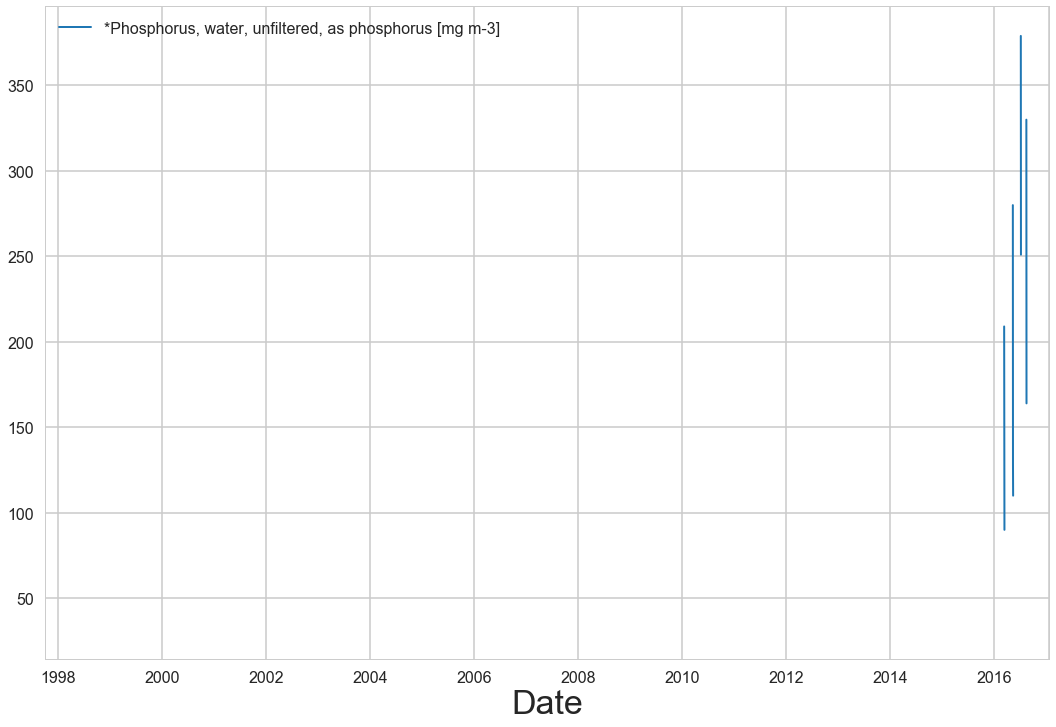

In [56]:
df.plot(x='Date', y='*Phosphorus, water, unfiltered, as phosphorus [mg m-3]')

In [222]:
gdf = df.groupby(['Year']).mean()[-18:]

In [223]:
gdf['P load'] = gdf['*Phosphorus, water, unfiltered, as phosphorus [mg m-3]']*gdf['Inflow volume [m3 d-1]']

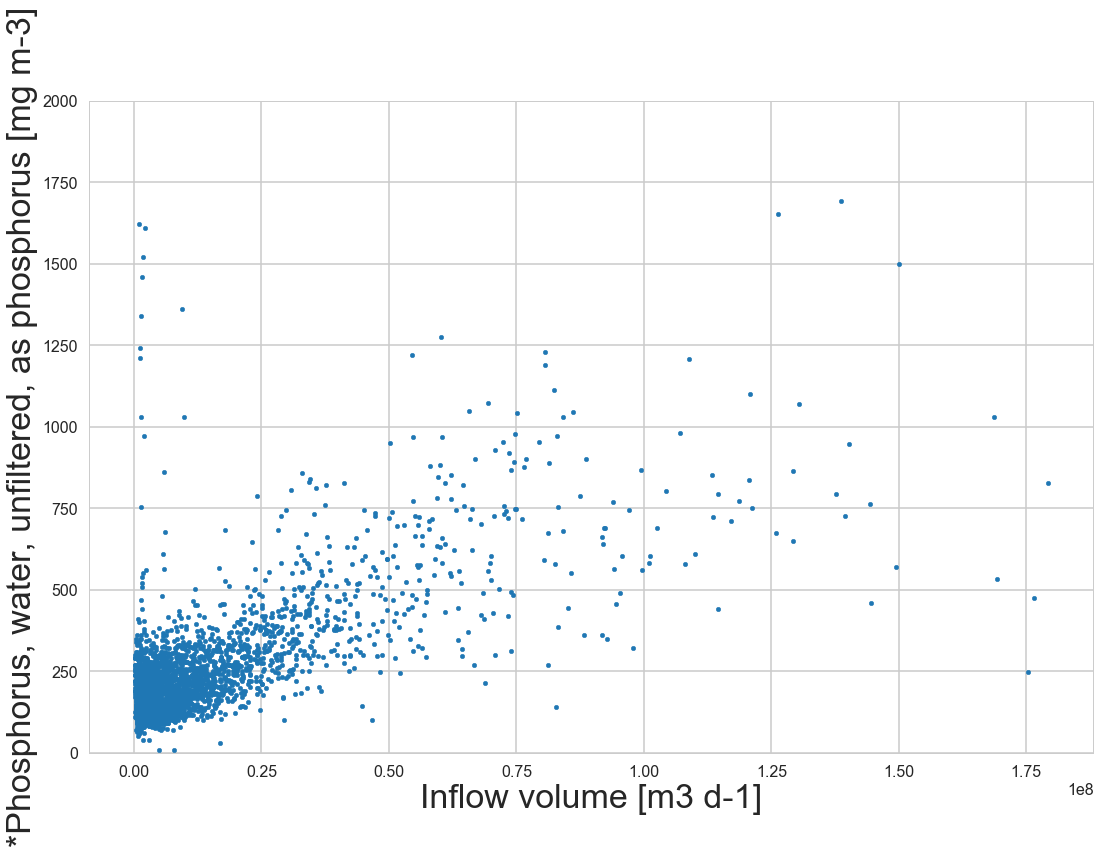

In [224]:
df.plot(y='*Phosphorus, water, unfiltered, as phosphorus [mg m-3]', x='Inflow volume [m3 d-1]', kind='scatter',ylim=(0,2000))

In [225]:
df['P load'] = df['*Phosphorus, water, unfiltered, as phosphorus [mg m-3]']*df['Inflow volume [m3 d-1]']

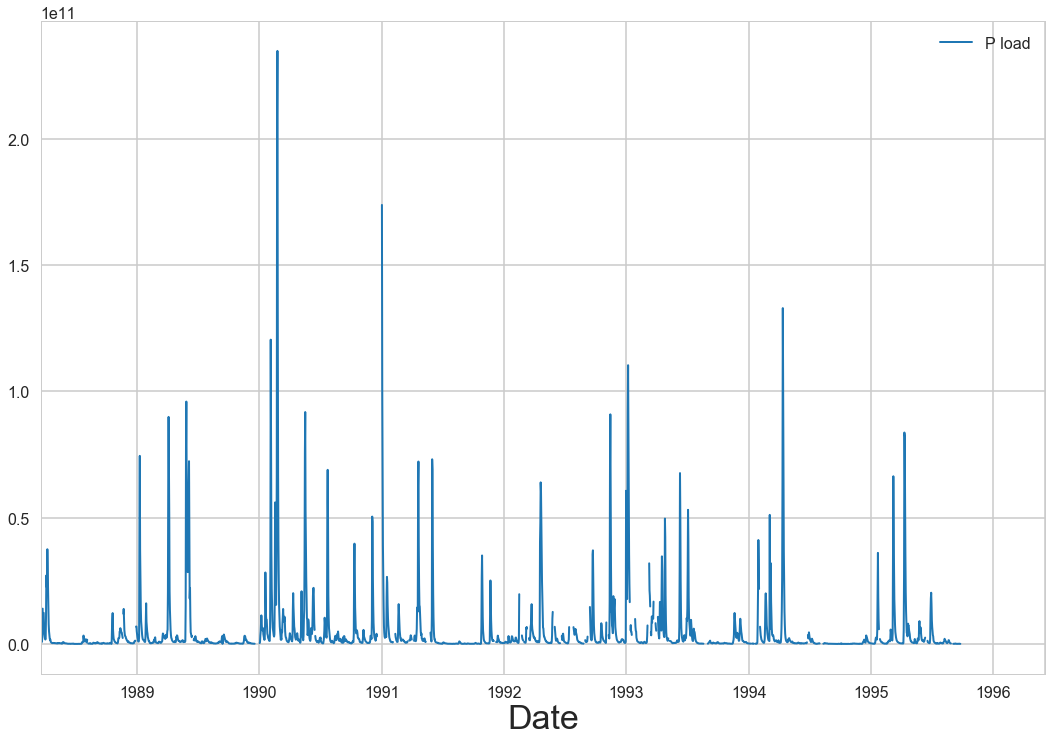

In [226]:
df[3000:6000].plot(y='P load',x='Date')

In [227]:
#prep
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MaxAbsScaler, QuantileTransformer

#models
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, Ridge, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#validation libraries
from sklearn.cross_validation import KFold, StratifiedKFold
from IPython.display import display
from sklearn import metrics


In [228]:
mdf = df[['Date','*Phosphorus, water, unfiltered, as phosphorus [mg m-3]', 'Inflow volume [m3 d-1]', '*Suspended sediment concentration [mg m-3]', 'Inflow temperature [°C]']]

In [229]:
mdf.describe()

,"*Phosphorus, water, unfiltered, as phosphorus [mg m-3]",Inflow volume [m3 d-1],*Suspended sediment concentration [mg m-3],Inflow temperature [°C]
count,3253.000000,1.354000e+04,8.280000e+03,5994.000000
mean,246.418562,1.374651e+07,8.409676e+04,13.374920
std,192.457537,2.191189e+07,1.236383e+05,9.449523
min,8.000000,1.345617e+05,1.000000e+03,-0.100000
25%,140.000000,1.947474e+06,2.300000e+04,4.100000
50%,197.000000,5.198973e+06,4.100000e+04,13.300000
75%,278.000000,1.519629e+07,8.700000e+04,22.500000
max,4600.000000,2.566458e+08,1.880000e+06,31.300000


In [230]:
mdf.dropna().describe()

,"*Phosphorus, water, unfiltered, as phosphorus [mg m-3]",Inflow volume [m3 d-1],*Suspended sediment concentration [mg m-3],Inflow temperature [°C]
count,1785.000000,1.785000e+03,1.785000e+03,1785.000000
mean,266.758590,1.406173e+07,9.034323e+04,13.304883
std,196.094909,2.195128e+07,1.442556e+05,9.366321
min,8.000000,1.345617e+05,3.000000e+03,-0.100000
25%,153.000000,1.985396e+06,2.500000e+04,4.350000
50%,212.000000,5.945179e+06,4.650000e+04,12.500000
75%,298.000000,1.578041e+07,8.600000e+04,22.900000
max,2030.000000,1.792117e+08,1.770000e+06,30.000000


In [231]:
mdfna = mdf.dropna()

In [232]:
mdfna.tail()

,Date,"*Phosphorus, water, unfiltered, as phosphorus [mg m-3]",Inflow volume [m3 d-1],*Suspended sediment concentration [mg m-3],Inflow temperature [°C]
13410,2016-09-18,156.0,5284603.179,36000.0,23.2
13414,2016-09-22,222.0,3388507.131,39000.0,24.4
13418,2016-09-26,228.0,1447149.436,37000.0,21.9
13421,2016-09-29,203.0,2829464.619,31000.0,18.2
13425,2016-10-03,256.0,5810616.922,61000.0,18.9


In [233]:
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pylab import rc, plot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split
from pandas import read_csv, DataFrame
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import ml_metrics, string, re, pylab as pl
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, explained_variance_score, accuracy_score
from sklearn import svm

In [234]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.svm import NuSVC
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers = [
    BernoulliNB(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    ExtraTreesClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    LabelPropagation(),
    LabelSpreading(),
    LinearDiscriminantAnalysis(),
    LinearSVC(),
    LogisticRegression(),
    LogisticRegressionCV(),
    MLPClassifier(),
    NearestCentroid(),
    RandomForestClassifier(n_estimators=1000, min_samples_leaf=1, random_state=1, n_jobs=6),
    RidgeClassifier(),
    RidgeClassifierCV(),
    SVC(),
    GradientBoostingClassifier(),
    LinearSVC(),
    LogisticRegression(),
    LogisticRegressionCV(),
    SGDClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    ExtraTreesClassifier(),
    KNeighborsClassifier(),
    MLPClassifier(),
    RandomForestClassifier(),
    RidgeClassifierCV(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    ExtraTreesClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
]

In [235]:
df[df.columns[3:]].corr()['*Phosphorus, water, unfiltered, as phosphorus [mg m-3]']

Inflow volume [m3 d-1]                                               0.644574
Inflow temperature [°C]                                             -0.041222
*Suspended sediment concentration [mg m-3]                           0.693184
*Orthophosphate, water, filtered, as phosphorus [mg m-3]             0.631030
*Phosphorus, water, unfiltered, as phosphorus [mg m-3]               1.000000
*Phosphorus, water, filtered, as phosphorus [mg m-3]                 0.517077
*Orthophosphate, water, filtered, as PO4 [mg m-3]                    0.630567
Inflow concentration of chlorophyll-a (Chla-P) [mg m-3]              0.332129
Inflow concentration of dissolved organic carbon (DOC) [mg m-3]      0.487277
Inflow concentration of dissolved inorganic carbon (DIC) [mg m-3]    0.046277
Inflow concentration of O2 [mg m-3]                                 -0.180925
Inflow concentration of NO3 [mg m-3]                                 0.171959
Inflow concentration of NH4 [mg m-3]                            

In [236]:
mdfna.corr()['*Phosphorus, water, unfiltered, as phosphorus [mg m-3]']

*Phosphorus, water, unfiltered, as phosphorus [mg m-3]    1.000000
Inflow volume [m3 d-1]                                    0.684550
*Suspended sediment concentration [mg m-3]                0.744902
Inflow temperature [°C]                                  -0.018808
Name: *Phosphorus, water, unfiltered, as phosphorus [mg m-3], dtype: float64

In [237]:
metrics = [mean_squared_error, r2_score, median_absolute_error, explained_variance_score]

In [238]:
models = []
models.append(RandomForestRegressor(n_estimators=10000, min_samples_leaf=5, n_jobs=6))
models.append(linear_model.Ridge())
models.append(linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0]))
models.append(linear_model.LassoCV(alphas=[0.1, 1.0, 10.0], positive=True))
models.append(linear_model.ElasticNetCV(alphas=[0.1, 1.0, 10.0]))
models.append(linear_model.Lars())
models.append(linear_model.LassoLarsCV())
models.append(linear_model.Lasso(positive=True))
models.append(linear_model.OrthogonalMatchingPursuitCV())
models.append(linear_model.BayesianRidge())
models.append(linear_model.ElasticNet(positive=True))
models.append(linear_model.LinearRegression())
models.append(linear_model.HuberRegressor())

In [240]:
df['DOY'] = df.Date.dt.dayofyear

In [242]:
df['TP (unfilt) [mg m-3]'] = df['*Phosphorus, water, unfiltered, as phosphorus [mg m-3]']

In [243]:
col = list(df.columns)
col.remove('*Phosphorus, water, unfiltered, as phosphorus [mg m-3]')
col.remove('P load')
col.remove('Date')
col.remove('Inflow concentration of CH4 [mg m-3]')
col.remove('Inflow concentration of total solid iron (Fe3+) [mg m-3]')
col.remove('Inflow concentration of aqueous iron (Fe2+) [mg m-3]')

In [244]:
tdf=df[col[3:]]

In [245]:
tdf.head()

,Inflow volume [m3 d-1],Inflow temperature [°C],*Suspended sediment concentration [mg m-3],"*Orthophosphate, water, filtered, as phosphorus [mg m-3]","*Phosphorus, water, filtered, as phosphorus [mg m-3]","*Orthophosphate, water, filtered, as PO4 [mg m-3]",Inflow concentration of chlorophyll-a (Chla-P) [mg m-3],Inflow concentration of dissolved organic carbon (DOC) [mg m-3],Inflow concentration of dissolved inorganic carbon (DIC) [mg m-3],Inflow concentration of O2 [mg m-3],Inflow concentration of NO3 [mg m-3],Inflow concentration of NH4 [mg m-3],Inflow concentration of SO4 [mg m-3],Inflow concentration of Ca2+ [mg m-3],Inflow pH [-],Inflow concentration of aluminum (Al3+) [mg m-3],Inflow concentration of dissolved silica [mg m-3],"*Iron, suspended sediment, recoverable [mg m-3]","*Iron, water, unfiltered, recoverable [mg m-3]","*Iron, water, filtered [mg m-3]","*Suspended solids, water, unfiltered [mg m-3]",DOY,TP (unfilt) [mg m-3]
0,2.071026e+07,NaN,57000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,1.685691e+07,NaN,36000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
2,1.293015e+07,2.0,32000.0,NaN,110.0,NaN,NaN,7700.0,NaN,14100.0,NaN,10.0,62000.0,72000.0,7.7,NaN,7400.0,2600.0,2600.0,40.0,NaN,3,220.0
3,1.012882e+07,NaN,28000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
4,8.159329e+06,NaN,31000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN


In [246]:
tdf.describe()

,Inflow volume [m3 d-1],Inflow temperature [°C],*Suspended sediment concentration [mg m-3],"*Orthophosphate, water, filtered, as phosphorus [mg m-3]","*Phosphorus, water, filtered, as phosphorus [mg m-3]","*Orthophosphate, water, filtered, as PO4 [mg m-3]",Inflow concentration of chlorophyll-a (Chla-P) [mg m-3],Inflow concentration of dissolved organic carbon (DOC) [mg m-3],Inflow concentration of dissolved inorganic carbon (DIC) [mg m-3],Inflow concentration of O2 [mg m-3],Inflow concentration of NO3 [mg m-3],Inflow concentration of NH4 [mg m-3],Inflow concentration of SO4 [mg m-3],Inflow concentration of Ca2+ [mg m-3],Inflow pH [-],Inflow concentration of aluminum (Al3+) [mg m-3],Inflow concentration of dissolved silica [mg m-3],"*Iron, suspended sediment, recoverable [mg m-3]","*Iron, water, unfiltered, recoverable [mg m-3]","*Iron, water, filtered [mg m-3]","*Suspended solids, water, unfiltered [mg m-3]",DOY,TP (unfilt) [mg m-3]
count,1.354000e+04,5994.000000,8.280000e+03,558.000000,245.000000,558.000000,5.0000,169.000000,74.000000,5538.000000,33.000000,579.000000,347.000000,260.000000,3312.000000,51.000000,237.000000,9.000000,11.000000,219.000000,15.000000,13540.000000,3253.000000
mean,1.374651e+07,13.374920,8.409676e+04,72.790323,71.959184,222.969534,37.3200,7369.763314,54.459459,10659.444465,24862.151515,100.190415,61054.178674,58830.384615,8.146863,38.431373,6408.481013,2264.444444,2282.727273,37.269863,226800.000000,182.821270,246.418562
std,2.191189e+07,9.449523,1.236383e+05,60.931637,53.496729,186.951488,15.2775,1704.619408,59.475836,2509.107705,11400.628503,129.546232,25710.511921,14991.562616,0.407698,47.639167,31671.987687,3368.174992,3111.488682,55.681714,161717.213502,105.604373,192.457537
min,1.345617e+05,-0.100000,1.000000e+03,4.000000,10.000000,11.000000,18.9000,4500.000000,30.000000,4300.000000,171.000000,9.000000,10100.000000,17000.000000,7.000000,10.000000,10.000000,340.000000,340.000000,0.000000,5000.000000,1.000000,8.000000
25%,1.947474e+06,4.100000,2.300000e+04,20.000000,20.000000,55.000000,29.9000,6440.000000,30.000000,8600.000000,15300.000000,26.000000,42750.000000,47150.000000,7.800000,10.000000,1700.000000,650.000000,600.000000,10.000000,102000.000000,91.000000,140.000000
50%,5.198973e+06,13.300000,4.100000e+04,66.000000,70.000000,202.000000,31.5000,7100.000000,30.000000,10700.000000,24900.000000,52.000000,58000.000000,58750.000000,8.200000,20.000000,5030.000000,960.000000,990.000000,19.000000,220000.000000,183.000000,197.000000
75%,1.519629e+07,22.500000,8.700000e+04,111.000000,110.000000,344.625000,51.7000,7860.000000,47.500000,12700.000000,34200.000000,117.500000,76000.000000,68975.000000,8.400000,40.000000,6700.000000,2200.000000,2400.000000,36.400000,352500.000000,274.000000,278.000000
max,2.566458e+08,31.300000,1.880000e+06,402.000000,350.000000,1230.000000,54.6000,15900.000000,390.000000,20000.000000,49100.000000,1200.000000,160000.000000,99000.000000,9.400000,230.000000,490000.000000,11000.000000,11000.000000,378.000000,514000.000000,366.000000,4600.000000


In [257]:
tdf = tdf.dropna(subset=['TP (unfilt) [mg m-3]'])

In [191]:
# tdf = tdf.fillna(tdf.mean())

In [249]:
# tdf['Inflow volume [m3 d-1]'].fillna(tdf.groupby('DOY')['Inflow volume [m3 d-1]'].transform('mean'))

In [250]:
tdf.describe()

,Inflow volume [m3 d-1],Inflow temperature [°C],*Suspended sediment concentration [mg m-3],"*Orthophosphate, water, filtered, as phosphorus [mg m-3]","*Phosphorus, water, filtered, as phosphorus [mg m-3]","*Orthophosphate, water, filtered, as PO4 [mg m-3]",Inflow concentration of chlorophyll-a (Chla-P) [mg m-3],Inflow concentration of dissolved organic carbon (DOC) [mg m-3],Inflow concentration of dissolved inorganic carbon (DIC) [mg m-3],Inflow concentration of O2 [mg m-3],Inflow concentration of NO3 [mg m-3],Inflow concentration of NH4 [mg m-3],Inflow concentration of SO4 [mg m-3],Inflow concentration of Ca2+ [mg m-3],Inflow pH [-],Inflow concentration of aluminum (Al3+) [mg m-3],Inflow concentration of dissolved silica [mg m-3],"*Iron, suspended sediment, recoverable [mg m-3]","*Iron, water, unfiltered, recoverable [mg m-3]","*Iron, water, filtered [mg m-3]","*Suspended solids, water, unfiltered [mg m-3]",DOY,TP (unfilt) [mg m-3]
count,1.354000e+04,5994.000000,8.280000e+03,558.000000,245.000000,558.000000,5.0000,169.000000,74.000000,5538.000000,33.000000,579.000000,347.000000,260.000000,3312.000000,51.000000,237.000000,9.000000,11.000000,219.000000,15.000000,13540.000000,3253.000000
mean,1.374651e+07,13.374920,8.409676e+04,72.790323,71.959184,222.969534,37.3200,7369.763314,54.459459,10659.444465,24862.151515,100.190415,61054.178674,58830.384615,8.146863,38.431373,6408.481013,2264.444444,2282.727273,37.269863,226800.000000,182.821270,246.418562
std,2.191189e+07,9.449523,1.236383e+05,60.931637,53.496729,186.951488,15.2775,1704.619408,59.475836,2509.107705,11400.628503,129.546232,25710.511921,14991.562616,0.407698,47.639167,31671.987687,3368.174992,3111.488682,55.681714,161717.213502,105.604373,192.457537
min,1.345617e+05,-0.100000,1.000000e+03,4.000000,10.000000,11.000000,18.9000,4500.000000,30.000000,4300.000000,171.000000,9.000000,10100.000000,17000.000000,7.000000,10.000000,10.000000,340.000000,340.000000,0.000000,5000.000000,1.000000,8.000000
25%,1.947474e+06,4.100000,2.300000e+04,20.000000,20.000000,55.000000,29.9000,6440.000000,30.000000,8600.000000,15300.000000,26.000000,42750.000000,47150.000000,7.800000,10.000000,1700.000000,650.000000,600.000000,10.000000,102000.000000,91.000000,140.000000
50%,5.198973e+06,13.300000,4.100000e+04,66.000000,70.000000,202.000000,31.5000,7100.000000,30.000000,10700.000000,24900.000000,52.000000,58000.000000,58750.000000,8.200000,20.000000,5030.000000,960.000000,990.000000,19.000000,220000.000000,183.000000,197.000000
75%,1.519629e+07,22.500000,8.700000e+04,111.000000,110.000000,344.625000,51.7000,7860.000000,47.500000,12700.000000,34200.000000,117.500000,76000.000000,68975.000000,8.400000,40.000000,6700.000000,2200.000000,2400.000000,36.400000,352500.000000,274.000000,278.000000
max,2.566458e+08,31.300000,1.880000e+06,402.000000,350.000000,1230.000000,54.6000,15900.000000,390.000000,20000.000000,49100.000000,1200.000000,160000.000000,99000.000000,9.400000,230.000000,490000.000000,11000.000000,11000.000000,378.000000,514000.000000,366.000000,4600.000000


In [258]:
features = [tdf.columns[0], tdf.columns[-2]]
target = [tdf.columns[-1]]
train = tdf.sample(frac=0.8, random_state=1)
test = tdf.loc[~tdf.index.isin(train.index)]

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor method score: 0.31080337013440607
mean_squared_error : 44521.008516546506
r2_score : -1.101683313099421
median_absolute_error : 37.391893062765206
explained_variance_score : -1.0990568371719434


<Figure size 720x720 with 0 Axes>

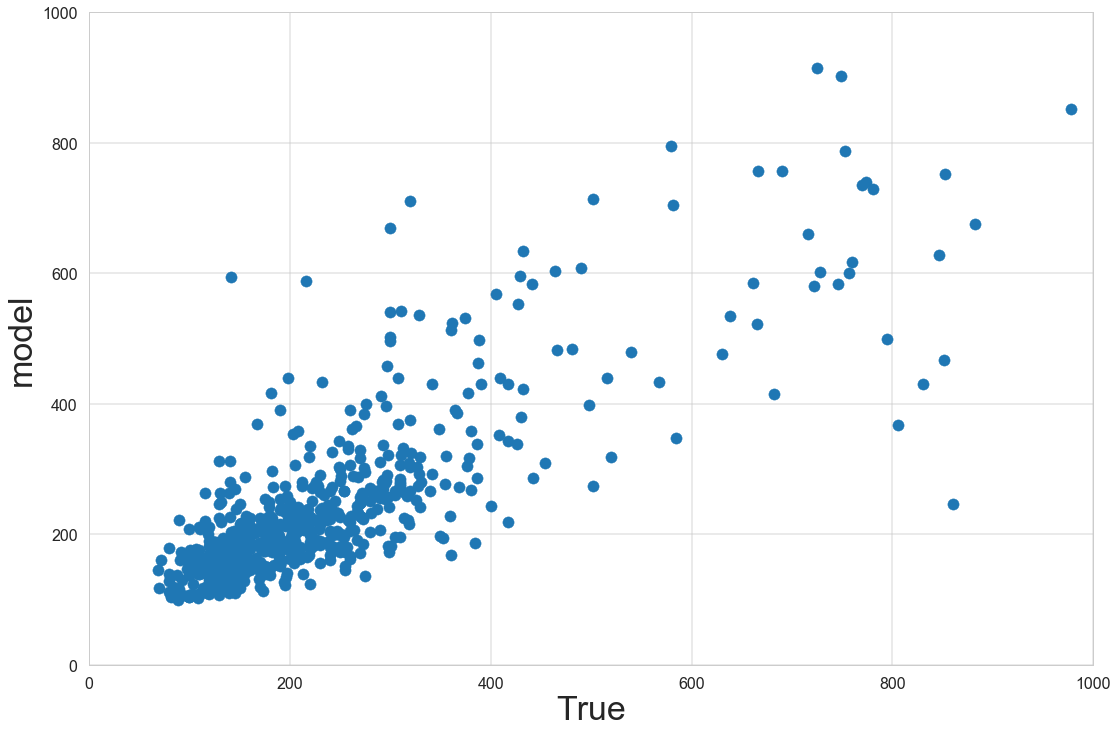

In [259]:
predicted_results = np.empty((len(models),len(test[target].values),))
results = {}
plt.figure(figsize=(10, 10)) 
for i,model in enumerate([RandomForestRegressor(n_estimators=10000, min_samples_leaf=5, n_jobs=6)]):
    name = str(model).split('(')[0]
    results[name] = {}
    model.fit(train[features], train[target])
    results[name] = {'score': model.score(test[features], test[target]), 'model':name}
    print(str(model).split('(')[0], 'method score:', results[name]['score'])
    
    for m in metrics:
        results[name][m.__name__] = m(model.predict(test[features]), test[target].values)
        print(m.__name__,':', results[name][m.__name__])
    predicted_results[i,:] = model.predict(test[features]).flatten()
    plt.figure()
    plt.scatter(x=test[target].values.flatten(), y=model.predict(test[features]).flatten())
#     plt.scatter(model.predict(test[features]), test[target].values)
#     plt.ylim(0,10)
    plt.ylabel('model')
    plt.xlabel('True')
    # plt.xlim(0,10)
    plt.grid(alpha=0.5)
    plt.ylim(0,1000)
    plt.xlim(0,1000)
    plt.show()

In [264]:
df['model TP']=model.predict(df[features]).flatten()

In [275]:
df['model P load'] = df['model TP']*df['Inflow volume [m3 d-1]']*1e-9

In [57]:
df.groupby(['Year']).sum().plot(y='model P load',xlim=(1990,2015))

KeyError: 'model P load'

In [278]:
df.set_index('Date', inplace=True)

In [279]:
x2= pd.date_range('1983-04-01','2015-12-31',freq='D')
df2=df.reindex(x2)

In [280]:
for c in df2.columns[3:]:
    df2[c] = pd.to_numeric(df2[c], errors='coerce')
    df2[c] = df2[c].interpolate(method='linear', limit=10)
df2.head()

,Year,Month,Day,Inflow volume [m3 d-1],Inflow temperature [°C],*Suspended sediment concentration [mg m-3],"*Orthophosphate, water, filtered, as phosphorus [mg m-3]","*Phosphorus, water, unfiltered, as phosphorus [mg m-3]","*Phosphorus, water, filtered, as phosphorus [mg m-3]","*Orthophosphate, water, filtered, as PO4 [mg m-3]",Inflow concentration of chlorophyll-a (Chla-P) [mg m-3],Inflow concentration of dissolved organic carbon (DOC) [mg m-3],Inflow concentration of dissolved inorganic carbon (DIC) [mg m-3],Inflow concentration of O2 [mg m-3],Inflow concentration of NO3 [mg m-3],Inflow concentration of NH4 [mg m-3],Inflow concentration of SO4 [mg m-3],Inflow concentration of aqueous iron (Fe2+) [mg m-3],Inflow concentration of Ca2+ [mg m-3],Inflow pH [-],Inflow concentration of CH4 [mg m-3],Inflow concentration of total solid iron (Fe3+) [mg m-3],Inflow concentration of aluminum (Al3+) [mg m-3],Inflow concentration of dissolved silica [mg m-3],"*Iron, suspended sediment, recoverable [mg m-3]","*Iron, water, unfiltered, recoverable [mg m-3]","*Iron, water, filtered [mg m-3]","*Suspended solids, water, unfiltered [mg m-3]",P load,DOY,TP (unfilt) [mg m-3],model,model TP,model P load
1983-04-01,1983,4,1,20869289.41,5.9,138000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11300.0,NaN,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91,NaN,236.050058,236.050058,4.926197
1983-04-02,1983,4,2,22068111.43,5.8,122000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11000.0,NaN,NaN,NaN,NaN,NaN,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92,NaN,279.797050,279.797050,6.174592
1983-04-03,1983,4,3,51500415.25,6.2,220000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,NaN,NaN,8.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93,NaN,523.468342,523.468342,26.958837
1983-04-04,1983,4,4,61164388.65,6.6,538000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,NaN,632.121394,632.121394,38.663319
1983-04-05,1983,4,5,49787812.36,6.7,435000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,NaN,NaN,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95,NaN,533.133027,533.133027,26.543527


In [281]:
df2.to_csv('mau_P_load.csv')